# Python as a Financial Calculator 

## Time Value of Money (Basic Python)

### Present value of single cashflow

$$PV=\frac{FV}{(1+r)^n}$$

In [1]:
def pv(fv, r, n):
    '''
    Present value of a single cashflow
    
    -------
    
    fv : future value
    r : interest rates
    n : number of periods
    '''
    return fv / (1+r)**n

In [2]:
pv(100, 0.01, 1)

99.00990099009901

In [3]:
pv(100, 0.01, 0)

100.0

In [4]:
pv?

Signature: pv(fv, r, n)
Docstring:
Present value of a single cashflow

-------

fv : future value
r : interest rates
n : number of periods
File:      c:\users\anthonyn\downloads\financial_analytics_python-master\financial_analytics_python-master\<ipython-input-1-7d7e0411d78c>
Type:      function


### Present value of perpetuity

$$PV = \frac{c}{r}$$

In [5]:
def pv_perpetuity(c, r):
    '''
    Present value of perpetuity
    
    -----
    
    c : cashflow
    f: interest rates
    '''
    return c / r

In [6]:
pv_perpetuity(100, 0.01)

10000.0

In [7]:
int_range = [0.01, 0.02, 0.05, 0.1]

In [8]:
for int_ in int_range:
    print("[INFO] Interest Rate = {0}%, Present Value = {1}".format(int_ * 100, pv_perpetuity(100, int_)))

[INFO] Interest Rate = 1.0%, Present Value = 10000.0
[INFO] Interest Rate = 2.0%, Present Value = 5000.0
[INFO] Interest Rate = 5.0%, Present Value = 2000.0
[INFO] Interest Rate = 10.0%, Present Value = 1000.0


### Present value of cashflow with constant growth

In [9]:
def pv_constant_growth(c, r, g):
    '''
    Present value of cashflow with constant growth
    Often used in calculating present value of dividend paying company with constant growth
    -----
    
    c : first cash flow
    r : discount rate / interest rates
    g : growth rate
    '''
    if r < g:
        print("Unable to compute because the required rate of return is lower than the growth rate")
    else:
        return c / (r - g)    

In [10]:
pv_constant_growth(c=100, r=0.02, g=0.05)

Unable to compute because the required rate of return is lower than the growth rate


In [11]:
pv_constant_growth(c=100, r=0.07, g=0.05)

4999.999999999999

# Call Option (Scipy and Numpy)

[The Complete Guide to Option Pricing Formulas / Edition 2 by Espen Haug](https://www.amazon.com/Complete-Guide-Option-Pricing-Formulas/dp/0071389970)

In [12]:
def BlackScholes(S, X, T, r, sigma):
    '''
    Valuation of European call option
    Black-Scholes (1973)
    
    
    Parameters    
    ==========    
    S : float        
        stock price
    X : float        
        strike price of option  
    T : float        
        time to expiration in years    
    r : float       
        risk-free interest rate 
    sigma : float        
            volatility of the relative price change of the
            underlying stock price
    N(x) : The cumulative normal distribution function
    
    Returns    
    =======    
    call value : float        
                 present value of the European call option   
       
    Example
    =======
    BlackScholes(S=60, X=65, T=0.25, r=0.08, sigma=0.3)
    >>> 2.1333684449162007
    
    '''
    import numpy as np
    from scipy import stats
    
    d1 = (np.log(S/X) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    n_d1 = stats.norm.cdf(d1)
    n_d2 = stats.norm.cdf(d2)
    call = S * n_d1 - X * np.exp(-r * T) * n_d2
    return call

In [13]:
BlackScholes(S=60, X=65, T=0.25, r=0.08, sigma=0.3)

2.1333684449162007

# Intro to Numpy and Scipy - Linear Regression, CAPM (Numpy, matplotlib, scipy, statsmodel)

## Interpolation

[doc](https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.interp1d.html#scipy.interpolate.interp1d)

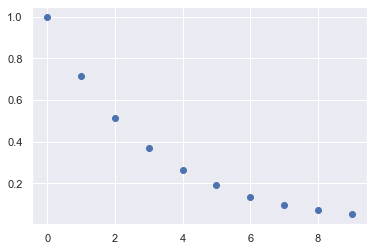

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np; import seaborn as sns; sns.set()
from scipy import interpolate
x = np.arange(0, 10)
y = np.exp(-x/3.0)
plt.scatter(x, y);

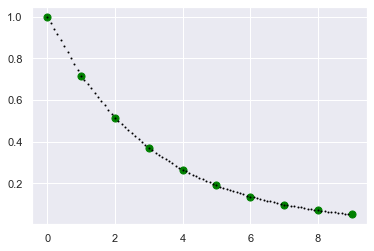

In [15]:
f = interpolate.interp1d(x, y)
xnew = np.arange(0, 9, 0.1)
ynew = f(xnew)   # use interpolation function returned by `interp1d`
plt.scatter(x, y, s=50, c="green");
plt.scatter(xnew, ynew, s=1, c='black');

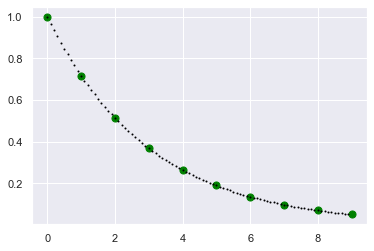

In [16]:
f = interpolate.interp1d(x, y, kind='cubic')
xnew = np.arange(0, 9, 0.1)
ynew = f(xnew)   # use interpolation function returned by `interp1d`
plt.scatter(x, y, s=50, c="green");
plt.scatter(xnew, ynew, s=1, c='black');

## Optimisation

In [17]:
import scipy.optimize as optimize

Estimate the value of $x$ that minimise the equation $x^2+x-18$

In [18]:
def func(x):
    return x**2 + x - 18

In [19]:
optimize.fmin(func, 1)    # Setting 1 as the initial value

Optimization terminated successfully.
         Current function value: -18.250000
         Iterations: 18
         Function evaluations: 36


array([-0.5])

## CAPM

$$r_i-r_f=\alpha+\beta_i(r_{mkt}-r_f)$$

### Scipy

In [20]:
stock_rtns =  [0.20, 0.10, 0.12, 0.06, 0.04, 0.05, 0.07, 0.10, 0.11, 0.12, 0.14, 0.11, 0.07, 0.04, 0.04, 0.05, 0.07, 0.10, 0.11, 0.12]
market_rtns = [0.15, 0.12, 0.10, 0.05, 0.03, 0.04, 0.06, 0.09, 0.15, 0.12, 0.10, 0.05, 0.03, 0.06, 0.12, 0.10, 0.05, 0.03, 0.04, 0.06]

In [21]:
from scipy import stats

In [22]:
beta, alpha, rho, p_value, std_error = stats.linregress(market_rtns, stock_rtns)

In [23]:
stats.linregress?

Signature: stats.linregress(x, y=None)
Docstring:
Calculate a linear least-squares regression for two sets of measurements.

Parameters
----------
x, y : array_like
    Two sets of measurements.  Both arrays should have the same length.  If
    only `x` is given (and ``y=None``), then it must be a two-dimensional
    array where one dimension has length 2.  The two sets of measurements
    are then found by splitting the array along the length-2 dimension.  In
    the case where ``y=None`` and `x` is a 2x2 array, ``linregress(x)`` is
    equivalent to ``linregress(x[0], x[1])``.

Returns
-------
slope : float
    Slope of the regression line.
intercept : float
    Intercept of the regression line.
rvalue : float
    Correlation coefficient.
pvalue : float
    Two-sided p-value for a hypothesis test whose null hypothesis is
    that the slope is zero, using Wald Test with t-distribution of
    the test statistic.
stderr : float
    Standard error of the estimated gradient.

See also
---

In [24]:
beta

0.49876543209876534

In [25]:
alpha

0.05234567901234569

In [26]:
rho**2

0.23927474022470835

In [27]:
p_value

0.02860864960270171

### Statsmodels

In [28]:
import statsmodels.api as sm

In [29]:
X = sm.add_constant(market_rtns)

In [30]:
np.c_[np.ones(len(stock_rtns)), market_rtns]

array([[1.  , 0.15],
       [1.  , 0.12],
       [1.  , 0.1 ],
       [1.  , 0.05],
       [1.  , 0.03],
       [1.  , 0.04],
       [1.  , 0.06],
       [1.  , 0.09],
       [1.  , 0.15],
       [1.  , 0.12],
       [1.  , 0.1 ],
       [1.  , 0.05],
       [1.  , 0.03],
       [1.  , 0.06],
       [1.  , 0.12],
       [1.  , 0.1 ],
       [1.  , 0.05],
       [1.  , 0.03],
       [1.  , 0.04],
       [1.  , 0.06]])

In [31]:
model = sm.OLS(stock_rtns, np.c_[np.ones(len(stock_rtns)), market_rtns])

In [32]:
results = model.fit()

In [33]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.197
Method:                 Least Squares   F-statistic:                     5.662
Date:                Fri, 02 Oct 2020   Prob (F-statistic):             0.0286
Time:                        18:36:22   Log-Likelihood:                 38.866
No. Observations:                  20   AIC:                            -73.73
Df Residuals:                      18   BIC:                            -71.74
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0523      0.018      2.879      0.010       0.014       0.091
x1             0.4988      0.210      2.379      0.029       0.058       0.939
==============================================================================
Omnibus:                        0.009   Durbin-Watson:                   0.817
Prob(Omnibus):                  0.995   Jarque-Bera (JB):                0.125
Skew:                          -0.019   Prob(JB):                        0.939
Kurtosis:                       2.615   Cond. No.                         25.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [1]:
TIINGO_API_KEY = ""

# Risk and Returns (Pandas, Matplotlib, Bokeh)

### Return Distribution

In [34]:
!pip install pandas_datareader

In [35]:
TIINGO_API_KEY = ""

In [36]:
import os
import pandas_datareader as pdr
from datetime import datetime

In [37]:
start = datetime(2016, 1, 1)
end = datetime(2020, 1, 1)
df = pdr.get_data_tiingo('GOOG', start=start, end=end, api_key=TIINGO_API_KEY)

In [38]:
df.head()

close    high       low    open   volume  \
symbol date                                                                   
GOOG   2016-01-04 00:00:00+00:00  741.84  744.06  731.2577  743.00  3272776   
       2016-01-05 00:00:00+00:00  742.58  752.00  738.6400  746.45  1950691   
       2016-01-06 00:00:00+00:00  743.62  747.18  728.9200  730.00  1947034   
       2016-01-07 00:00:00+00:00  726.39  738.50  719.0600  730.31  2963741   
       2016-01-08 00:00:00+00:00  714.47  733.23  713.0000  731.45  2450857   

                                  adjClose  adjHigh    adjLow  adjOpen  \
symbol date                                                              
GOOG   2016-01-04 00:00:00+00:00    741.84   744.06  731.2577   743.00   
       2016-01-05 00:00:00+00:00    742.58   752.00  738.6400   746.45   
       2016-01-06 00:00:00+00:00    743.62   747.18  728.9200   730.00   
       2016-01-07 00:00:00+00:00    726.39   738.50  719.0600   730.31   
       2016-01-08 00:00:00+00:00    714.47   733.23  713.0000   731.45   

                                  adjVolume  divCash  splitFactor  
symbol date                                                        
GOOG   2016-01-04 00:00:00+00:00    3272776      0.0          1.0  
       2016-01-05 00:00:00+00:00    1950691      0.0          1.0  
       2016-01-06 00:00:00+00:00    1947034      0.0          1.0  
       2016-01-07 00:00:00+00:00    2963741      0.0          1.0  
       2016-01-08 00:00:00+00:00    2450857      0.0          1.0

In [39]:
goog = df['close'].copy()
goog = goog.pct_change()
mu = goog.mean()
sigma = goog.std()

C:\Users\anthonyn\Anaconda3\envs\ds\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\anthonyn\Anaconda3\envs\ds\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


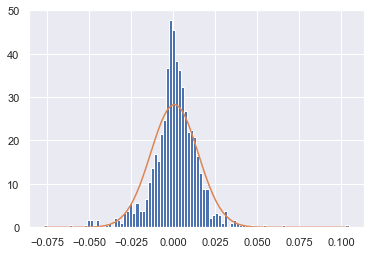

In [40]:
from scipy.stats import norm
import matplotlib.pyplot as plt

x = np.linspace(goog.min(), goog.max(), 100)
plt.hist(goog, 100, density=True);
plt.plot(x, norm.pdf(x, mu, sigma))
plt.show()

C:\Users\anthonyn\Anaconda3\envs\ds\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


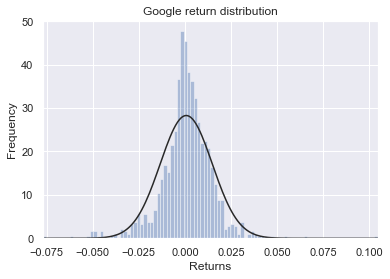

In [41]:
from scipy.stats import norm
plt.xlim(goog.min(), goog.max())
sns.distplot(goog, bins=100, fit=norm, kde=False);
plt.title("Google return distribution") 
plt.xlabel("Returns") 
plt.ylabel("Frequency");

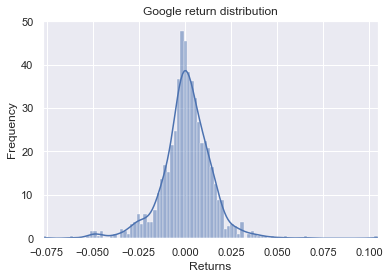

In [42]:
from scipy.stats import norm
plt.xlim(goog.min(), goog.max())
sns.histplot(goog, bins=100, stat='density', common_norm=True, kde=True);
plt.title("Google return distribution") 
plt.xlabel("Returns") 
plt.ylabel("Frequency");

### Candlesticks

In [43]:
from bokeh.plotting import figure, show, output_file
from bokeh.io import output_notebook
from math import pi

In [44]:
start = datetime(2016, 1, 1)
end = datetime(2016, 4, 1)
df = pdr.get_data_tiingo('GOOG', start=start, end=end, api_key=TIINGO_API_KEY)
f = df.reset_index().set_index('date')[['close', 'high', 'low', 'open', 'volume']]
f.columns = ['Close', 'High', 'Low', 'Open', 'Volume']

In [45]:
inc = f.Close > f.Open
dec = f.Open > f.Close
w = 12*60*60*1000 # half day in ms

TOOLS = "pan,wheel_zoom,box_zoom,reset,save"
output_notebook()
p = figure(x_axis_type="datetime", tools=TOOLS, plot_width=800, title = "F Candlestick")
p.xaxis.major_label_orientation = pi/4
p.grid.grid_line_alpha=0.3
p.segment(f.index, f.High, f.index, f.Low, color="black")
p.vbar(f.index[inc], w, f.Open[inc], f.Close[inc], fill_color="#2aff04", line_color="black")
p.vbar(f.index[dec], w, f.Open[dec], f.Close[dec], fill_color="#F2583E", line_color="black")
#output_file("candlestick.html", title="candlestick.py example")
show(p);  # open a browser

Loading BokehJS ...

### Comparing return versus volatility for several stocks 

In [46]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

In [47]:
start = datetime(2016, 1, 1)
end = datetime(2017, 1, 1)

df = pdr.get_data_tiingo(['SPY', 'KO', 'V', 'DIS'], start=start, end=end, api_key=TIINGO_API_KEY)

In [48]:
df

close        high         low  \
symbol date                                                            
SPY    2016-01-04 00:00:00+00:00  201.020004  201.029999  198.589996   
       2016-01-05 00:00:00+00:00  201.360001  201.899994  200.050003   
       2016-01-06 00:00:00+00:00  198.820007  200.059998  197.600006   
       2016-01-07 00:00:00+00:00  194.050003  197.440002  193.589996   
       2016-01-08 00:00:00+00:00  191.919998  195.850006  191.580002   
...                                      ...         ...         ...   
DIS    2016-12-23 00:00:00+00:00  105.150000  105.340000  104.750000   
       2016-12-27 00:00:00+00:00  105.170000  105.556000  104.780000   
       2016-12-28 00:00:00+00:00  104.300000  105.320000  104.060000   
       2016-12-29 00:00:00+00:00  104.560000  104.770000  103.870000   
       2016-12-30 00:00:00+00:00  104.220000  105.000000  103.960000   

                                        open     volume    adjClose  \
symbol date                                                           
SPY    2016-01-04 00:00:00+00:00  200.490005  222353500  183.212522   
       2016-01-05 00:00:00+00:00  201.399994  110845800  183.522401   
       2016-01-06 00:00:00+00:00  198.339996  152112600  181.207414   
       2016-01-07 00:00:00+00:00  195.330002  213436100  176.859963   
       2016-01-08 00:00:00+00:00  195.190002  209817200  174.918646   
...                                      ...        ...         ...   
DIS    2016-12-23 00:00:00+00:00  105.240000    3238753  100.672961   
       2016-12-27 00:00:00+00:00  104.850000    3639539  100.692110   
       2016-12-28 00:00:00+00:00  104.990000    5178595   99.859152   
       2016-12-29 00:00:00+00:00  104.230000    5896763  100.108082   
       2016-12-30 00:00:00+00:00  104.570000    6982680   99.782558   

                                     adjHigh      adjLow     adjOpen  \
symbol date                                                            
SPY    2016-01-04 00:00:00+00:00  183.221632  180.997778  182.729474   
       2016-01-05 00:00:00+00:00  184.014558  182.328450  183.558851   
       2016-01-06 00:00:00+00:00  182.337559  180.095487  180.769925   
       2016-01-07 00:00:00+00:00  179.949657  176.440706  178.026573   
       2016-01-08 00:00:00+00:00  178.500512  174.608769  177.898975   
...                                      ...         ...         ...   
DIS    2016-12-23 00:00:00+00:00  100.854871  100.289992  100.759129   
       2016-12-27 00:00:00+00:00  101.061675  100.318715  100.385734   
       2016-12-28 00:00:00+00:00  100.835723   99.629371  100.519774   
       2016-12-29 00:00:00+00:00  100.309141   99.447460   99.792133   
       2016-12-30 00:00:00+00:00  100.529348   99.533628  100.117656   

                                  adjVolume  divCash  splitFactor  
symbol date                                                        
SPY    2016-01-04 00:00:00+00:00  222353500      0.0          1.0  
       2016-01-05 00:00:00+00:00  110845800      0.0          1.0  
       2016-01-06 00:00:00+00:00  152112600      0.0          1.0  
       2016-01-07 00:00:00+00:00  213436100      0.0          1.0  
       2016-01-08 00:00:00+00:00  209817200      0.0          1.0  
...                                     ...      ...          ...  
DIS    2016-12-23 00:00:00+00:00    3238753      0.0          1.0  
       2016-12-27 00:00:00+00:00    3639539      0.0          1.0  
       2016-12-28 00:00:00+00:00    5178595      0.0          1.0  
       2016-12-29 00:00:00+00:00    5896763      0.0          1.0  
       2016-12-30 00:00:00+00:00    6982680      0.0          1.0  

[1008 rows x 12 columns]

In [49]:
returns = df['close'].unstack(level=-1).T.dropna().pct_change().dropna()
rtn = np.array(returns.mean()) * 250
vol = np.array(returns.std()) * np.sqrt(250)

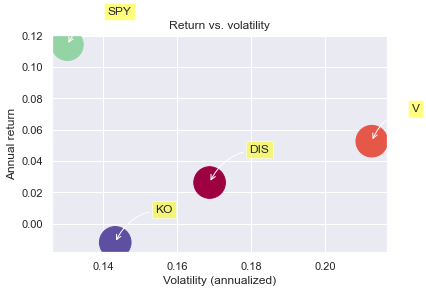

In [50]:
labels = ['{0}'.format(i) for i in returns.columns]
plt.xlabel('Volatility (annualized)')
plt.ylabel('Annual return')
plt.title('Return vs. volatility')


color = np.array([ 0.18, 0.96, 0.75, 0.3])
plt.scatter(vol, rtn, marker = 'o', c=color,s = 1000, 
            cmap=plt.get_cmap('Spectral'));


for label, x, y in zip(labels, vol, rtn):
    plt.annotate(label, 
                 xy = (x,y), 
                 xytext = (40, 30), 
                 textcoords = 'offset points',
                 bbox = dict(boxstyle = 'square, pad=0.3',
                             fc = 'yellow', 
                             alpha = 0.5),
                 arrowprops = dict(arrowstyle = '->', 
                                   connectionstyle = 'arc3, rad = 0.3'))

[matplotlib doc on annotation](https://matplotlib.org/2.0.2/users/annotations.html)

# Time Series Analysis (Pandas, Scipy)

### Data

In [51]:
start = datetime(2016, 1, 1)
end = datetime(2017, 1, 1)

prices = pdr.get_data_tiingo(['SPY', 'IBM', 'MSFT', 'XOM'], start=start, end=end, api_key=TIINGO_API_KEY)

In [52]:
prices['returns'] = prices['close'].pct_change()
returns = prices["returns"].unstack(level=-1).T.dropna()
returns

symbol,IBM,MSFT,SPY,XOM
date,,,,
2016-01-05 00:00:00+00:00,-0.000736,0.004562,0.001691,0.008521
2016-01-06 00:00:00+00:00,-0.005006,-0.018165,-0.012614,-0.008321
2016-01-07 00:00:00+00:00,-0.017090,-0.034783,-0.023992,-0.016006
2016-01-08 00:00:00+00:00,-0.009258,0.003067,-0.010977,-0.020202
2016-01-11 00:00:00+00:00,0.012155,-0.000573,0.000990,-0.013389
...,...,...,...,...
2016-12-23 00:00:00+00:00,-0.002095,-0.004878,0.001464,-0.001761
2016-12-27 00:00:00+00:00,0.002579,0.000633,0.002481,0.000441
2016-12-28 00:00:00+00:00,-0.005684,-0.004583,-0.008265,-0.004959


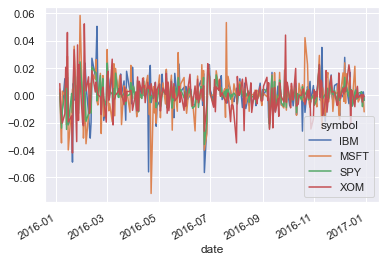

In [53]:
%matplotlib inline
returns.plot();

T-Test with p-value. Is the returns significantly different from zero?

In [54]:
from scipy import stats
for oo in returns.columns:
    print("{} \t {}".format(oo, stats.ttest_1samp(returns[oo], 0)))

IBM 	 Ttest_1sampResult(statistic=1.1107797169351117, pvalue=0.2677303526761802)
MSFT 	 Ttest_1sampResult(statistic=0.667960384828841, pvalue=0.5047750588306804)
SPY 	 Ttest_1sampResult(statistic=0.8783414806426296, pvalue=0.38060180556009304)
XOM 	 Ttest_1sampResult(statistic=0.8889983416972157, pvalue=0.3748585599475992)


### Bartlett’s test for equal variances


[doc](https://docs.scipy.org/doc/scipy-0.18.1/reference/generated/scipy.stats.bartlett.html)


Bartlett’s test tests the null hypothesis that all input samples are from populations with equal variances. For samples from significantly non-normal populations, Levene’s test levene is more robust.

In [55]:
import scipy as sp 
print(sp.stats.bartlett(returns["IBM"], returns["MSFT"]))

BartlettResult(statistic=4.738377488895217, pvalue=0.029496877606962707)


### Levene test for equal variances.

[doc](https://docs.scipy.org/doc/scipy-0.18.1/reference/generated/scipy.stats.levene.html)

The Levene test tests the null hypothesis that all input samples are from populations with equal variances. Levene’s test is an alternative to Bartlett’s test bartlett in the case where there are significant deviations from normality.

In [56]:
print(sp.stats.levene(returns["IBM"], returns["MSFT"]))

LeveneResult(statistic=1.525082817111583, pvalue=0.21743193385514079)


### Jan Month Effect

In [57]:
start = datetime(2015, 1, 1)
end = datetime(2020, 1, 1)

prices = pdr.get_data_tiingo(['SPY', 'IBM', 'MSFT', 'XOM'], start=start, end=end, api_key=TIINGO_API_KEY)

In [58]:
prices

close    high     low    open     volume  \
symbol date                                                                   
SPY    2015-01-02 00:00:00+00:00  205.43  206.88  204.18  206.38  121465865   
       2015-01-05 00:00:00+00:00  201.72  204.37  201.35  204.17  169632646   
       2015-01-06 00:00:00+00:00  199.82  202.72  198.86  202.09  209151408   
       2015-01-07 00:00:00+00:00  202.31  202.72  200.88  201.42  125346709   
       2015-01-08 00:00:00+00:00  205.90  206.16  203.99  204.01  147217784   
...                                  ...     ...     ...     ...        ...   
XOM    2019-12-24 00:00:00+00:00   70.02   70.50   69.91   70.35    3979400   
       2019-12-26 00:00:00+00:00   70.13   70.50   70.01   70.19    8840200   
       2019-12-27 00:00:00+00:00   69.89   70.31   69.88   70.20   10516100   
       2019-12-30 00:00:00+00:00   69.48   70.44   69.40   70.09   12689400   
       2019-12-31 00:00:00+00:00   69.78   69.80   69.01   69.02   13151800   

                                    adjClose     adjHigh      adjLow  \
symbol date                                                            
SPY    2015-01-02 00:00:00+00:00  183.413750  184.708351  182.297715   
       2015-01-05 00:00:00+00:00  180.101357  182.467352  179.771010   
       2015-01-06 00:00:00+00:00  178.404982  180.994185  177.547867   
       2015-01-07 00:00:00+00:00  180.628125  180.994185  179.351381   
       2015-01-08 00:00:00+00:00  183.833380  184.065515  182.128077   
...                                      ...         ...         ...   
XOM    2019-12-24 00:00:00+00:00   66.374188   66.829195   66.269915   
       2019-12-26 00:00:00+00:00   66.478460   66.829195   66.364709   
       2019-12-27 00:00:00+00:00   66.250957   66.649088   66.241478   
       2019-12-30 00:00:00+00:00   65.862305   66.772319   65.786470   
       2019-12-31 00:00:00+00:00   66.146684   66.165643   65.416777   

                                     adjOpen  adjVolume  divCash  splitFactor  
symbol date                                                                    
SPY    2015-01-02 00:00:00+00:00  184.261937  121465865      0.0          1.0  
       2015-01-05 00:00:00+00:00  182.288786  169632646      0.0          1.0  
       2015-01-06 00:00:00+00:00  180.431703  209151408      0.0          1.0  
       2015-01-07 00:00:00+00:00  179.833508  125346709      0.0          1.0  
       2015-01-08 00:00:00+00:00  182.145934  147217784      0.0          1.0  
...                                      ...        ...      ...          ...  
XOM    2019-12-24 00:00:00+00:00   66.687005    3979400      0.0          1.0  
       2019-12-26 00:00:00+00:00   66.535336    8840200      0.0          1.0  
       2019-12-27 00:00:00+00:00   66.544816   10516100      0.0          1.0  
       2019-12-30 00:00:00+00:00   66.440543   12689400      0.0          1.0  
       2019-12-31 00:00:00+00:00   65.426256   13151800      0.0          1.0  

[5032 rows x 12 columns]

In [59]:
mth_price = prices.reset_index().set_index("date")['close'].resample('BM').last()
mth_price

date
2015-01-30 00:00:00+00:00    87.42
2015-02-27 00:00:00+00:00    88.54
2015-03-31 00:00:00+00:00    85.00
2015-04-30 00:00:00+00:00    87.37
2015-05-29 00:00:00+00:00    85.20
2015-06-30 00:00:00+00:00    83.20
2015-07-31 00:00:00+00:00    79.21
2015-08-31 00:00:00+00:00    75.24
2015-09-30 00:00:00+00:00    74.35
2015-10-30 00:00:00+00:00    82.74
2015-11-30 00:00:00+00:00    81.66
2015-12-31 00:00:00+00:00    77.95
2016-01-29 00:00:00+00:00    77.85
2016-02-29 00:00:00+00:00    80.15
2016-03-31 00:00:00+00:00    83.59
2016-04-29 00:00:00+00:00    88.40
2016-05-31 00:00:00+00:00    89.02
2016-06-30 00:00:00+00:00    93.74
2016-07-29 00:00:00+00:00    88.95
2016-08-31 00:00:00+00:00    87.14
2016-09-30 00:00:00+00:00    87.28
2016-10-31 00:00:00+00:00    83.32
2016-11-30 00:00:00+00:00    87.30
2016-12-30 00:00:00+00:00    90.26
2017-01-31 00:00:00+00:00    83.89
2017-02-28 00:00:00+00:00    81.32
2017-03-31 00:00:00+00:00    82.01
2017-04-28 00:00:00+00:00    81.65
2017-05-31 00:0

In [60]:
mth_rtns = mth_price.pct_change().dropna()
mth_rtns.head()

date
2015-02-27 00:00:00+00:00    0.012812
2015-03-31 00:00:00+00:00   -0.039982
2015-04-30 00:00:00+00:00    0.027882
2015-05-29 00:00:00+00:00   -0.024837
2015-06-30 00:00:00+00:00   -0.023474
Freq: BM, Name: close, dtype: float64

In [61]:
jan_rtns = mth_rtns[mth_rtns.index.month==1]

In [62]:
other_rtns = mth_rtns[mth_rtns.index.month!=1]

In [63]:
import scipy as sp
print(sp.stats.bartlett(jan_rtns, other_rtns))

BartlettResult(statistic=0.28570874958212283, pvalue=0.5929836798985927)


# Fama-French

In [64]:
from pandas_datareader.famafrench import get_available_datasets
import pandas_datareader.data as web
import statsmodels.api as sm
import pandas as pd

In [65]:
dataset = web.DataReader('F-F_Research_Data_5_Factors_2x3', 'famafrench')

In [66]:
print(dataset[0].head())
print(dataset[0].tail())

         Mkt-RF   SMB   HML   RMW   CMA    RF
Date                                         
2015-10    7.75 -2.16 -0.21  0.85  0.45  0.00
2015-11    0.56  3.36 -0.53 -2.62 -1.11  0.00
2015-12   -2.17 -2.98 -2.52  0.42  0.10  0.01
2016-01   -5.77 -3.41  1.98  2.81  3.04  0.01
2016-02   -0.08  0.96 -0.56  3.36  2.06  0.02
         Mkt-RF   SMB   HML   RMW   CMA    RF
Date                                         
2020-04   13.65  2.79 -1.35  2.51 -1.03  0.00
2020-05    5.58  1.92 -4.95  0.71 -3.28  0.01
2020-06    2.46  1.94 -2.22  0.03  0.34  0.01
2020-07    5.77 -3.06 -1.32  0.59  1.02  0.01
2020-08    7.62 -0.80 -3.10  4.13 -1.50  0.01


In [67]:
start = datetime(2015, 1, 1)
end = datetime(2020, 1, 1)

prices = pdr.get_data_tiingo(['XOM'], start=start, end=end, api_key=TIINGO_API_KEY)

In [68]:
prices = prices['close']

In [69]:
xom = prices.reset_index(level=0, drop=True).resample('BM').last()
rtns = xom.pct_change()
rtns.head()

date
2015-01-30 00:00:00+00:00         NaN
2015-02-27 00:00:00+00:00    0.012812
2015-03-31 00:00:00+00:00   -0.039982
2015-04-30 00:00:00+00:00    0.027882
2015-05-29 00:00:00+00:00   -0.024837
Freq: BM, Name: close, dtype: float64

In [70]:
rtns = rtns.reset_index()
rtns

,date,close
0,2015-01-30 00:00:00+00:00,NaN
1,2015-02-27 00:00:00+00:00,0.012812
2,2015-03-31 00:00:00+00:00,-0.039982
3,2015-04-30 00:00:00+00:00,0.027882
4,2015-05-29 00:00:00+00:00,-0.024837
5,2015-06-30 00:00:00+00:00,-0.023474
6,2015-07-31 00:00:00+00:00,-0.047957
7,2015-08-31 00:00:00+00:00,-0.050120
8,2015-09-30 00:00:00+00:00,-0.011829
9,2015-10-30 00:00:00+00:00,0.112845


In [71]:
rtns_date = []
for oo in rtns.date:
    rtns_date.append(''.join([oo.strftime("%Y"), "-", oo.strftime("%m")]))

In [72]:
rtns_date = pd.to_datetime(rtns_date, format="%Y-%m", errors="ignore").to_period()
rtns['mth_date'] = rtns_date
rtns = rtns.set_index('mth_date')
rtns.pop("date")
rtns

,close
mth_date,
2015-01,NaN
2015-02,0.012812
2015-03,-0.039982
2015-04,0.027882
2015-05,-0.024837
2015-06,-0.023474
2015-07,-0.047957
2015-08,-0.050120
2015-09,-0.011829


In [73]:
dataset[0]

,Mkt-RF,SMB,HML,RMW,CMA,RF
Date,,,,,,
2015-10,7.75,-2.16,-0.21,0.85,0.45,0.00
2015-11,0.56,3.36,-0.53,-2.62,-1.11,0.00
2015-12,-2.17,-2.98,-2.52,0.42,0.10,0.01
2016-01,-5.77,-3.41,1.98,2.81,3.04,0.01
2016-02,-0.08,0.96,-0.56,3.36,2.06,0.02
2016-03,6.96,1.08,1.06,0.76,-0.06,0.02
2016-04,0.92,1.15,3.30,-2.87,1.97,0.01
2016-05,1.78,-0.73,-1.72,-1.17,-2.54,0.01
2016-06,-0.05,0.49,-1.46,1.43,1.96,0.02


In [74]:
combined = rtns.join(dataset[0]).dropna()
combined

,close,Mkt-RF,SMB,HML,RMW,CMA,RF
mth_date,,,,,,,
2015-10,0.112845,7.75,-2.16,-0.21,0.85,0.45,0.00
2015-11,-0.013053,0.56,3.36,-0.53,-2.62,-1.11,0.00
2015-12,-0.045432,-2.17,-2.98,-2.52,0.42,0.10,0.01
2016-01,-0.001283,-5.77,-3.41,1.98,2.81,3.04,0.01
2016-02,0.029544,-0.08,0.96,-0.56,3.36,2.06,0.02
2016-03,0.042920,6.96,1.08,1.06,0.76,-0.06,0.02
2016-04,0.057543,0.92,1.15,3.30,-2.87,1.97,0.01
2016-05,0.007014,1.78,-0.73,-1.72,-1.17,-2.54,0.01
2016-06,0.053022,-0.05,0.49,-1.46,1.43,1.96,0.02


In [75]:
y = combined.close

In [76]:
x = combined[['Mkt-RF', 'SMB', 'HML', 'RMW', 'CMA']]
x = sm.add_constant(x)

In [77]:
results=sm.OLS(y,x).fit() 

In [78]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  close   R-squared:                       0.640
Model:                            OLS   Adj. R-squared:                  0.600
Method:                 Least Squares   F-statistic:                     15.98
Date:                Fri, 02 Oct 2020   Prob (F-statistic):           4.90e-09
Time:                        18:37:08   Log-Likelihood:                 103.61
No. Observations:                  51   AIC:                            -195.2
Df Residuals:                      45   BIC:                            -183.6
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0126      0.005     -2.456      0.018      -0.023      -0.002
Mkt-RF         0.0121      0.002      7.641      0.000       0.009       0.015
SMB            0.0013      0.002      0.543      0.590      -0.003       0.006
HML           -0.0024      0.002     -1.013      0.317      -0.007       0.002
RMW           -0.0015      0.004     -0.410      0.684      -0.009       0.006
CMA            0.0156      0.004      3.843      0.000       0.007       0.024
==============================================================================
Omnibus:                        0.628   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.731   Jarque-Bera (JB):                0.750
Skew:                          -0.212   Prob(JB):                        0.687
Kurtosis:                       2.585   Cond. No.                         4.40
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Rolling Beta

In [79]:
import pandas_datareader.data as web
from datetime import datetime
#start = datetime(1990, 1, 1)
#end = datetime(2018, 1, 1)
#prices = web.DataReader(['SPY', 'IBM', 'MSFT', 'XOM'], 'morningstar', start, end)

start = datetime(2000, 1, 1)
end = datetime(2020, 1, 1)

prices = pdr.get_data_tiingo(['SPY', 'IBM', 'MSFT', 'XOM'], start=start, end=end, api_key=TIINGO_API_KEY)


In [80]:
returns = prices["close"].unstack(level=-1).T.dropna().resample('BM').last().pct_change().dropna()
returns.head()

symbol,IBM,MSFT,SPY,XOM
date,,,,
2000-02-29 00:00:00+00:00,-0.084633,-0.086850,-0.015226,-0.091337
2000-03-31 00:00:00+00:00,0.152019,0.188878,0.094134,0.035719
2000-04-28 00:00:00+00:00,-0.058038,-0.343529,-0.035121,-0.003974
2000-05-31 00:00:00+00:00,-0.037578,-0.103082,-0.015722,0.072339
2000-06-30 00:00:00+00:00,0.020967,0.278772,0.017286,-0.057736


In [81]:
import statsmodels.api as sm

In [82]:
ibm = returns.IBM

In [83]:
spy = returns.SPY

In [84]:
print(len(ibm), len(spy))

239 239


In [85]:
beta= []
for oo in range(60,len(returns)):
    model = sm.OLS(sm.add_constant(ibm[:oo]), spy[:oo]).fit()
    beta.append([spy[:oo].index[-1], float(model.params[1])])
# beta = pd.DataFrame(beta)
# beta.columns = ['date', 'beta']
# beta = beta.set_index('date')

In [86]:
beta

[[Timestamp('2005-01-31 00:00:00+0000', tz='UTC', freq='BM'),
  1.6553386898451956],
 [Timestamp('2005-02-28 00:00:00+0000', tz='UTC', freq='BM'),
  1.648349146415664],
 [Timestamp('2005-03-31 00:00:00+0000', tz='UTC', freq='BM'),
  1.6443708163082948],
 [Timestamp('2005-04-29 00:00:00+0000', tz='UTC', freq='BM'),
  1.6634089519827193],
 [Timestamp('2005-05-31 00:00:00+0000', tz='UTC', freq='BM'),
  1.6477010317200014],
 [Timestamp('2005-06-30 00:00:00+0000', tz='UTC', freq='BM'),
  1.6479617140019691],
 [Timestamp('2005-07-29 00:00:00+0000', tz='UTC', freq='BM'),
  1.6656275585144864],
 [Timestamp('2005-08-31 00:00:00+0000', tz='UTC', freq='BM'),
  1.6669175365297113],
 [Timestamp('2005-09-30 00:00:00+0000', tz='UTC', freq='BM'),
  1.6666030123603737],
 [Timestamp('2005-10-31 00:00:00+0000', tz='UTC', freq='BM'),
  1.6560244985010817],
 [Timestamp('2005-11-30 00:00:00+0000', tz='UTC', freq='BM'), 1.6601994375185],
 [Timestamp('2005-12-30 00:00:00+0000', tz='UTC', freq='BM'),
  1.66353

In [87]:
beta = pd.DataFrame(beta)
beta.columns = ['date', 'beta']
beta = beta.set_index('date')

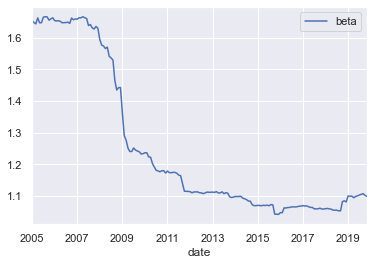

In [88]:
beta.plot();

### Efficient Frontier

Portfolio expected return

\begin{equation}
r_P = \sum^n_{i=1}w_ir_i
\end{equation}

\begin{equation}
r_P = w^Tr
\end{equation}

Variance for two-stocks portfolio

\begin{equation}
\sigma^2_P=w^2_1\sigma^2_1+w^2_2\sigma^2_2+2w_1w_2\sigma_{1,2}=w^2_1\sigma^2_1+w^2_2\sigma^2_2+2w_1w_2\rho\sigma_1\sigma_2
\end{equation}

Variance for multi-stocks portfolio

\begin{equation}
\sigma^2_P=w^T \sum w
\end{equation}



In [89]:
import numpy as np

In [90]:
np.random.seed(42)
returns = np.random.randint(0, 20, size=(10, 2)) / 100    # simulate returns
returns

array([[0.06, 0.19],
       [0.14, 0.1 ],
       [0.07, 0.06],
       [0.18, 0.1 ],
       [0.1 , 0.03],
       [0.07, 0.02],
       [0.01, 0.11],
       [0.05, 0.01],
       [0.  , 0.11],
       [0.11, 0.16]])

In [91]:
covariance = np.cov(returns.T)
covariance

array([[3.07666667e-03, 9.88888889e-05],
       [9.88888889e-05, 3.52111111e-03]])

In [92]:
weight = np.array([0.2, 0.8])

In [93]:
np.dot(weight.T, np.dot(np.cov(returns.T), weight))

0.0024082222222222226

In [94]:
print("Portfolio variance: {}".format(float(np.dot(np.dot(weight, covariance), weight.T))))

Portfolio variance: 0.0024082222222222226


In [95]:
print("Portfolio expected return: {}".format(float(np.dot(weight.T, returns.mean(axis=0)))))

Portfolio expected return: 0.08700000000000002


### Optimization 

[wolfram](http://www.wolframalpha.com/input/?i=x%5E2+-+4)

$$x^2 - 4x$$

In [96]:
from scipy.optimize import minimize

In [97]:
def f(x):
    return x**2 - 4

In [98]:
x0 = 0

In [99]:
result = minimize(f, x0, method="Nelder-Mead", options={"xtol" : 1e-10, 
                                                        'disp' : True})

Optimization terminated successfully.
         Current function value: -4.000000
         Iterations: 23
         Function evaluations: 53


In [100]:
print(result.x)

[0.]


In [101]:
result.fun

-4.0

### Portfolio Optimisation

#### Introduction

inspired by Yves Hilpisch excellent book `Python for Finance`

Portfolio expected return

\begin{equation}
r_P = \sum^n_{i=1}w_ir_i
\end{equation}

\begin{equation}
r_P = w^Tr
\end{equation}

Variance for two-stocks portfolio

\begin{equation}
\sigma^2_P=w^2_1\sigma^2_1+w^2_2\sigma^2_2+2w^2_1w^2_2\sigma_{1,2}w^2_1\sigma^2_1+w^2_2\sigma^2_2+2w^2_1w^2_2\rho\sigma_1\sigma_2
\end{equation}

Variance for multi-stocks portfolio

\begin{equation}
\sigma^2_P=w^T \sum w
\end{equation}



In [102]:
import matplotlib.pyplot as plt
%matplotlib inline
#import seaborn as sns
#sns.set()

import numpy as np
import pandas as pd
import pandas_datareader.data as web
from datetime import datetime
start = datetime(2000, 1, 1)
end = datetime(2020, 1, 1)
tickers = ['XOM', 'IBM', 'V', 'DIS', 'GLD']

prices = pdr.get_data_tiingo(tickers, start=start, end=end, api_key=TIINGO_API_KEY)

# prices = web.DataReader(tickers, 'morningstar', start, end)
returns = prices["close"].unstack(level=-1).T.dropna().pct_change().dropna()

In [103]:
returns.columns

Index(['DIS', 'GLD', 'IBM', 'V', 'XOM'], dtype='object', name='symbol')

Annualised Mean

In [104]:
print(returns.mean() * 250)

symbol
DIS    0.164055
GLD    0.052151
IBM    0.035715
V      0.197298
XOM    0.011757
dtype: float64


Variance - Covariance Matrix (Annualised)

In [105]:
returns.cov() * 250

symbol,DIS,GLD,IBM,V,XOM
symbol,,,,,
DIS,0.070149,-0.000581,0.030867,0.038503,0.036442
GLD,-0.000581,0.031971,-0.001069,-0.002402,0.003514
IBM,0.030867,-0.001069,0.048394,0.029054,0.027033
V,0.038503,-0.002402,0.029054,0.132323,0.031521
XOM,0.036442,0.003514,0.027033,0.031521,0.055814


In [106]:
portfolio_rtns = []
portfolio_vols = []
for oo in range(5000):
    weights = np.random.random(len(tickers))
    weights /= np.sum(weights)
    portfolio_rtns.append(np.sum(weights * returns.mean() * 250))
    portfolio_vols.append(np.sqrt(float(np.dot(np.dot(weights, returns.cov() * 250), weights.T))))

In [107]:
comb = pd.DataFrame([portfolio_rtns, portfolio_vols]).T
comb.columns = ['rtns', 'vols']
comb.head()

,rtns,vols
0,0.139345,0.214788
1,0.102402,0.189121
2,0.070036,0.165281
3,0.112397,0.172867
4,0.078957,0.159573


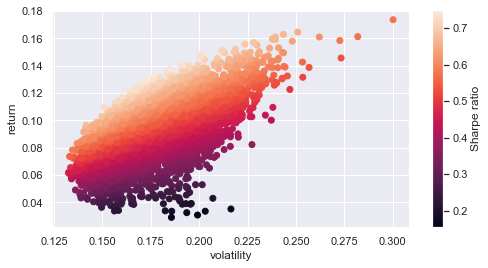

In [108]:
#sns.set(style='whitegrid')
plt.figure(figsize=(8, 4))
plt.scatter(portfolio_vols, portfolio_rtns, 
            c = np.array(portfolio_rtns) / np.array(portfolio_vols))
plt.grid(True)
plt.xlabel('volatility')
plt.ylabel('return')
plt.colorbar(label='Sharpe ratio');
#plt.axis('equal');
#plt.xlim(0, 0.25);
#plt.ylim(-0.10, 0.2);

In [109]:
 def portfolio_stats(weights):
        weights = np.array(weights)
        portfolio_rtn = np.sum(weights * returns.mean() * 250)
        portfolio_vol = np.sqrt(float(np.dot(np.dot(weights, returns.cov() * 250), weights.T)))
        return np.array([portfolio_rtn, portfolio_vol, portfolio_rtn / portfolio_vol])

In [110]:
import scipy.optimize as sco

#### Maximise Sharpe Ratio

In [111]:
def min_func_sharpe(weights):
    return - portfolio_stats(weights)[2]

In [112]:
cons = ({'type': 'eq', 'fun': lambda x:  np.sum(x) - 1})

In [113]:
bnds = tuple((0, 1) for x in range(len(tickers)))

In [114]:
%%time 
opts = sco.minimize(min_func_sharpe, len(tickers) * [1. / len(tickers),], 
                    method='SLSQP',
                    bounds=bnds, 
                    constraints=cons)

Wall time: 56.8 ms


In [115]:
opts

     fun: -0.7639826459756845
     jac: array([-1.50516629e-04, -2.12803483e-04,  2.80192792e-01,  6.42627478e-04,
        5.44358432e-01])
 message: 'Optimization terminated successfully'
    nfev: 36
     nit: 6
    njev: 6
  status: 0
 success: True
       x: array([3.97452362e-01, 3.82711424e-01, 2.73761049e-17, 2.19836214e-01,
       2.59124319e-17])

In [116]:
opts['x'].round(3)

array([0.397, 0.383, 0.   , 0.22 , 0.   ])

In [117]:
r, vol, sr = portfolio_stats(opts['x']).round(3)
print("Portfolio returns: {0}\nPortfolio volatility: {1}\nSharpe Ratio: {2}".format(r, vol, sr))

Portfolio returns: 0.129
Portfolio volatility: 0.168
Sharpe Ratio: 0.764


#### Minimise Variance

In [118]:
def min_func_variance(weights):             
    return portfolio_stats(weights)[1] ** 2

In [119]:
optv = sco.minimize(min_func_variance, len(tickers) * [1. / len(tickers),], 
                    method='SLSQP', bounds=bnds,
                    constraints=cons)

In [120]:
optv

     fun: 0.017380630828671383
     jac: array([0.03483609, 0.03468195, 0.03486967, 0.03489217, 0.03481675])
 message: 'Optimization terminated successfully'
    nfev: 78
     nit: 13
    njev: 13
  status: 0
 success: True
       x: array([0.07503829, 0.54672036, 0.25215128, 0.04533315, 0.08075693])

In [121]:
optv['x'].round(3)

array([0.075, 0.547, 0.252, 0.045, 0.081])

In [122]:
r, vol, sr = portfolio_stats(optv['x']).round(3)
print("Portfolio returns: {0}\nPortfolio volatility: {1}\nSharpe Ratio: {2}".format(r, vol, sr))

Portfolio returns: 0.06
Portfolio volatility: 0.132
Sharpe Ratio: 0.453


#### Efficient Frontier

Minimum risk portfolio for given return level

In [123]:
cons = ({'type': 'eq', 'fun': lambda x:  statistics(x)[0] - tret},                 
        {'type': 'eq', 'fun': lambda x:  np.sum(x) - 1})         
bnds = tuple((0, 1) for x in weights)

In [124]:
 def min_func_port(weights):             
        return portfolio_stats(weights)[1]

In [125]:
%%time

trets = np.linspace(0.0, 0.18, 100)         
tvols = []         
for tret in trets:             
    cons = ({'type': 'eq', 'fun': lambda x:  portfolio_stats(x)[0] - tret},                     
            {'type': 'eq', 'fun': lambda x:  np.sum(x) - 1})             
    res = sco.minimize(min_func_port, 
                       len(tickers) * [1. / len(tickers),], 
                       method='SLSQP',                                
                       bounds=bnds, constraints=cons)             
    tvols.append(res['fun'])         
tvols = np.array(tvols)

Wall time: 14.4 s


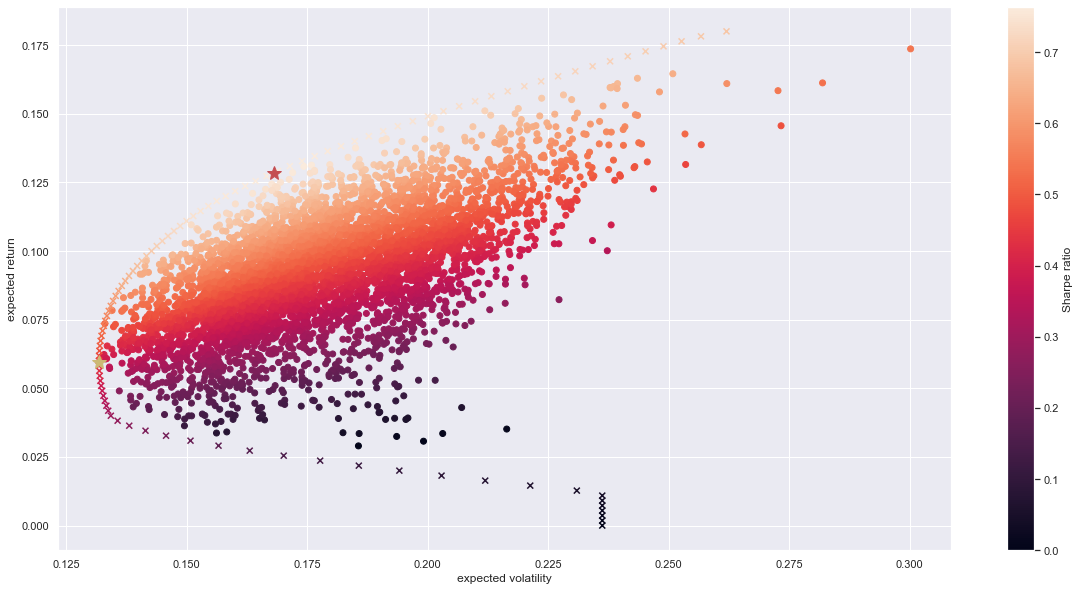

In [126]:
plt.figure(figsize=(20, 10))
plt.scatter(portfolio_vols, portfolio_rtns,                     
            c=np.array(portfolio_rtns) / np.array(portfolio_vols), 
            marker='o')                     
            # random portfolio composition         
plt.scatter(tvols, trets,    
            c=trets / tvols, marker='x')                     
            # efficient frontier         
plt.plot(portfolio_stats(opts['x'])[1], portfolio_stats(opts['x'])[0],                  
         'r*', markersize=15.0)                     
         # portfolio with highest Sharpe ratio         
plt.plot(portfolio_stats(optv['x'])[1], portfolio_stats(optv['x'])[0],                  
         'y*', markersize=15.0)                     
         # minimum variance portfolio         
plt.grid(True)         
plt.xlabel('expected volatility')         
plt.ylabel('expected return')         
plt.colorbar(label='Sharpe ratio');

#### Capital Market Line

In [127]:
import scipy.interpolate as sci

In [128]:
ind = np.argmin(tvols)         
evols = tvols[ind:]         
erets = trets[ind:] 

In [129]:
tck = sci.splrep(evols, erets)

In [130]:
def f(x):             
    ''' Efficient frontier function (splines approximation). '''
    return sci.splev(x, tck, der=0)         
    
def df(x):             
    ''' First derivative of efficient frontier function. '''             
    return sci.splev(x, tck, der=1) 

In [131]:
def equations(p, rf=0.02):
    eq1 = rf - p[0]             
    eq2 = rf + p[1] * p[2] - f(p[2])             
    eq3 = p[1] - df(p[2])             
    return eq1, eq2, eq3

In [132]:
opt = sco.fsolve(equations, [-0.1, 0.5, 0.20])

In [133]:
opt

array([0.02      , 0.64913919, 0.18170103])

In [134]:
np.round(equations(opt), 6)

array([0., 0., 0.])

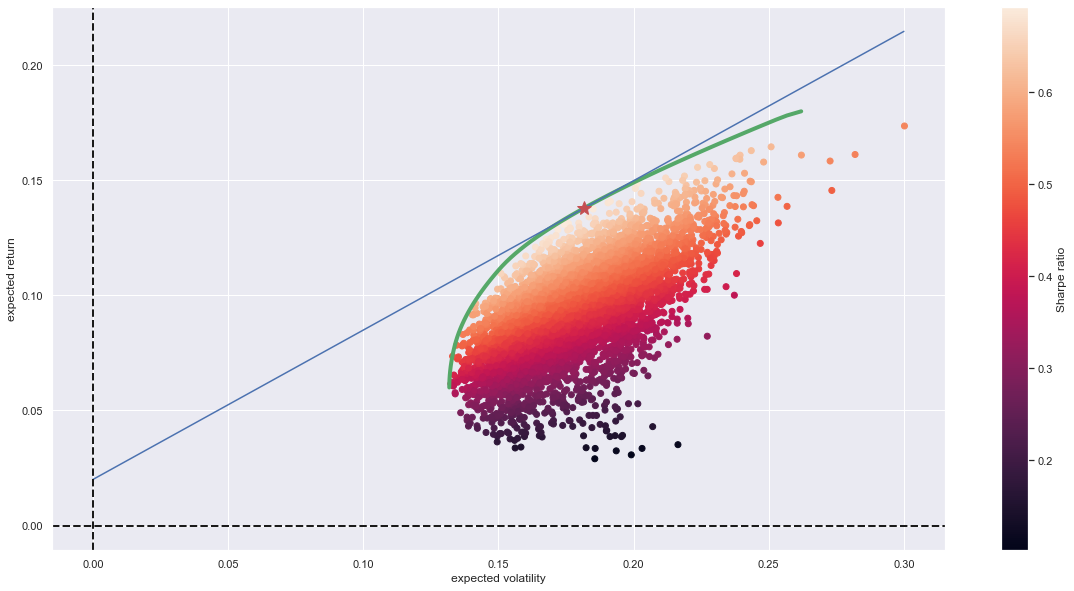

In [135]:
plt.figure(figsize=(20, 10))         
plt.scatter(portfolio_vols, portfolio_rtns,                     
            c=(np.array(portfolio_rtns) - 0.01) / np.array(portfolio_vols), marker='o')                     
            # random portfolio composition         
plt.plot(evols, erets, 'g', lw=4.0)                     
            # efficient frontier         
cx = np.linspace(0.0, 0.3)         
plt.plot(cx, opt[0] + opt[1] * cx, lw=1.5)                     
            # capital market line         
plt.plot(opt[2], f(opt[2]), 'r*', markersize=15.0)         
plt.grid(True)         
plt.axhline(0, color='k', ls='--', lw=2.0)         
plt.axvline(0, color='k', ls='--', lw=2.0)         
plt.xlabel('expected volatility')         
plt.ylabel('expected return')         
plt.colorbar(label='Sharpe ratio');

In [136]:
cons = ({'type': 'eq', 'fun': lambda x:  portfolio_stats(x)[0] - f(opt[2])},                 
        {'type': 'eq', 'fun': lambda x:  np.sum(x) - 1})         
res = sco.minimize(min_func_port, len(tickers) * [1. / len(tickers),], method='SLSQP',                                
                   bounds=bnds, constraints=cons)


In [137]:
res['x'].round(3)

array([0.438, 0.308, 0.   , 0.253, 0.   ])

# Time Series 2

In [138]:
import pandas as pd
from datetime import datetime
prices = pd.read_csv("data/^GSPC.csv")

In [139]:
prices['Date'] = pd.to_datetime(prices["Date"], infer_datetime_format=True)
prices.set_index("Date", inplace=True)

In [140]:
prices.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1950-01-01,16.660000,17.090000,16.650000,17.049999,17.049999,42570000
1950-02-01,17.049999,17.350000,16.990000,17.219999,17.219999,33430000
1950-03-01,17.240000,17.610001,17.070000,17.290001,17.290001,40410000
1950-04-01,17.340000,18.070000,17.340000,18.070000,18.070000,48250000
1950-05-01,18.219999,18.780001,18.110001,18.780001,18.780001,45080000


In [141]:
mth_price = prices.resample('BM')['Adj Close'].last()
mth_rtns = mth_price.pct_change()

jan_rtns = mth_rtns[mth_rtns.index.month==1]
other_rtns = mth_rtns[mth_rtns.index.month!=1]

In [142]:
from scipy import stats
print(stats.bartlett(jan_rtns, other_rtns))

BartlettResult(statistic=4.599212108275581, pvalue=0.031986653036613084)


In [143]:
pre_90s = prices[prices.index < datetime(1990,1,1)]
pre_90s.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1989-08-01,346.079987,352.730011,339.000000,351.450012,351.450012,3949100000
1989-09-01,351.450012,354.130005,341.369995,349.149994,349.149994,3035020000
1989-10-01,349.149994,360.440002,327.119995,340.359985,340.359985,4012670000
1989-11-01,340.359985,346.500000,330.910004,345.989990,345.989990,3032160000
1989-12-01,346.010010,354.100006,339.630005,353.399994,353.399994,3213420000


In [144]:
pre_90s_mth_price = pre_90s['Adj Close']
pre_90s_mth_rtns = pre_90s_mth_price.pct_change()

In [145]:
pre_90s_jan_rtns = pre_90s_mth_rtns[pre_90s_mth_rtns.index.month==1]
pre_90s_other_rtns = pre_90s_mth_rtns[pre_90s_mth_rtns.index.month!=1]

In [146]:
print(stats.bartlett(pre_90s_jan_rtns, pre_90s_other_rtns))

BartlettResult(statistic=6.23317744470195, pvalue=0.012537856336875803)


#### Heating Oil

[data](https://fred.stlouisfed.org/series/WHOILNYH)

In [147]:
import numpy as np
import datetime
import pandas as pd
df = pd.read_excel("data/WHOILNYH.xls", skiprows=10)
df.head()

,observation_date,WHOILNYH
0,1986-06-06,0.389
1,1986-06-13,0.384
2,1986-06-20,0.375
3,1986-06-27,0.374
4,1986-07-04,0.363


In [148]:
df.set_index("observation_date", inplace=True)

In [149]:
df_mth = df.resample('BM').last()

In [150]:
jul_price = df_mth[df_mth.index.month == 7]

In [151]:
jan_price = df_mth[df_mth.index.month == 1]

In [152]:
jul_price.head()

,WHOILNYH
observation_date,
1986-07-31,0.327
1987-07-31,0.542
1988-07-29,0.441
1989-07-31,0.487
1990-07-31,0.561


In [153]:
jan_price.head()

,WHOILNYH
observation_date,
1987-01-30,0.515
1988-01-29,0.493
1989-01-31,0.525
1990-01-31,0.611
1991-01-31,0.728


In [154]:
res = (jan_price.values - jul_price.values)/jul_price.values

In [155]:
res.mean()

0.10816980919231184

In [156]:
res.std()

0.35130734584470585

In [157]:
res.mean() / res.std()

0.3079064826618454

In [158]:
type(res)

numpy.ndarray

In [159]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

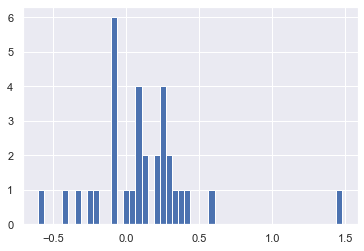

In [160]:
plt.hist(res, bins=50);

In [161]:
len(res[res < 0])

12

In [162]:
len(res[res > 0])

20

In [163]:
len(res)

32

In [164]:
res[res < 1.].mean()

0.06390210142432191

In [165]:
res[res < 1.].sum()

1.9809651441539795

In [166]:
res[res < 1.].mean() / res[res < 1.].sum()

0.03225806451612903

***